The age-adjusted death rate attributable to cardiovascular disease (CVD), based on 2017 data, is 219.4 per 100,000.
On average, someone dies of CVD every 37 seconds in the U.S. There are 2,353 deaths from CVD each day, based on 2017 data.
On average, someone in the U.S. has a stroke every 40 seconds. There are about 795,000 new or recurrent strokes each year, based on 1999 data.
On average, someone dies of a stoke every 3.59 minutes in the U.S. There are about 401 deaths from stroke each day, based on 2017 data.

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [244]:
### The CSV file downloaded from Kaggle
df = pd.read_csv("heart.csv")

In [245]:
df.shape

(1025, 14)

In [246]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [247]:
df.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [248]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [249]:
df.drop_duplicates(inplace = True)
df.shape

(302, 14)

In [250]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
301,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
126,66,1,0,120,302,0,0,151,0,0.4,1,0,2,1
691,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
102,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1
332,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [252]:
### metadata
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [253]:
### exploring target
df["target"].describe()

count    302.000000
mean       0.543046
std        0.498970
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [254]:
df["target"].unique()

array([0, 1])

### indicates this is a classification problem, target values  having 0 and 1 

In [255]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [256]:
### correlaions between features and target

In [257]:
print(df.corr()['target'].abs().sort_values(ascending=False))

target      1.000000
exang       0.435601
cp          0.432080
oldpeak     0.429146
thalach     0.419955
ca          0.408992
slope       0.343940
thal        0.343101
sex         0.283609
age         0.221476
trestbps    0.146269
restecg     0.134874
chol        0.081437
fbs         0.026826
Name: target, dtype: float64


Angina due to exercise the most correlationship and blood sugar has min

### EDA: Exploratory Data Analysis

1    164
0    138
Name: target, dtype: int64


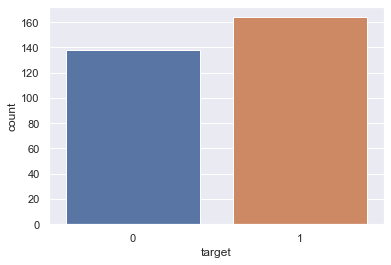

In [258]:
y = df['target']
sns.countplot(y)
target_temp = df.target.value_counts()
print(target_temp)

In [259]:
print(' % of patients without coronary diseage: '+str(round(target_temp[0]*100/303,2)))
print(' % of patients with coronary disease: '+str(round(target_temp[1]*100/303,2)))

 % of patients without coronary diseage: 45.54
 % of patients with coronary disease: 54.13


In [260]:
### get unique() feature of 'sex' 
df['sex'].unique()

array([1, 0])

[Text(0.5, 0, '1:Male/0:Female'), Text(0, 0.5, 'common ylabel')]

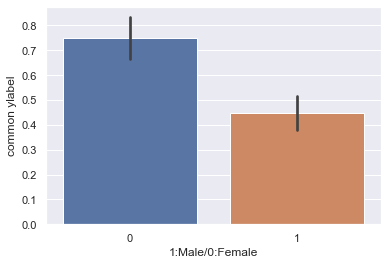

In [261]:
ax = sns.barplot(df['sex'],y)
ax.set(xlabel='1:Male/0:Female', ylabel='common ylabel')

probability females to have heart problems is higher than males

In [262]:
### Exploring chest pain typechest pain type, 1: typical angina,
### 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
df['cp'].unique()

array([0, 1, 2, 3])

[Text(0.5, 0, 'Chest Pain'), Text(0, 0.5, 'Target')]

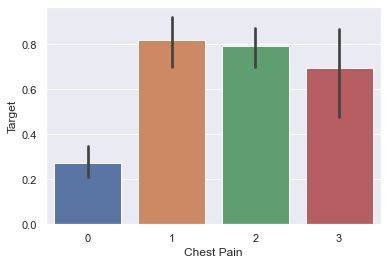

In [263]:
ax=sns.barplot(df['cp'],y)
ax.set(xlabel='Chest Pain', ylabel='Target')

### chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

In [264]:
### Explore Fasting Blood Sugar (fbs)
df['fbs'].unique()

array([0, 1])

[Text(0.5, 0, 'Fasting Blood Sugar'), Text(0, 0.5, 'Target')]

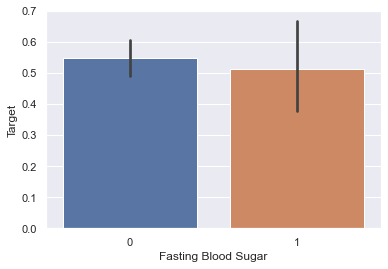

In [265]:
### exploring fastin blood sugar on heart issues
ax = sns.barplot(df['fbs'],y)
ax.set(xlabel='Fasting Blood Sugar', ylabel='Target')

### Blood sugar does not have any significant effect on heart issues

In [266]:
### Analyse resting ECG 
df['restecg'].unique()

array([1, 0, 2])

[Text(0.5, 0, 'Resting ECG'), Text(0, 0.5, 'Target')]

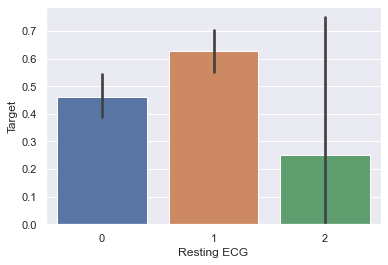

In [267]:
ax = sns.barplot(df['restecg'],y)
ax.set(xlabel='Resting ECG', ylabel = 'Target')

###  people with RestingECG(restecg) '1' and '0' are much more likely to have a heart issues than with restecg '2'

In [268]:
### Explore Exercise induced Angina (exang)
df['exang'].unique()

array([0, 1])

[Text(0.5, 0, 'Exercise Induced Angina'), Text(0, 0.5, 'Target')]

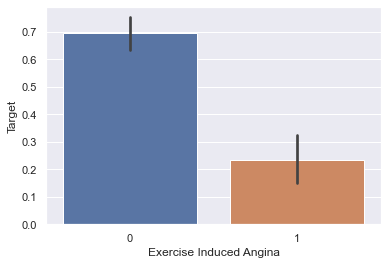

In [269]:
ax = sns.barplot(df['exang'], y)
ax.set(xlabel='Exercise Induced Angina', ylabel = 'Target')

### Persons  with exang=1 i.e. Exercise induced angina are much less likely to have heart issues

In [270]:
### Analyse Slope ( Slope of peak exercise ST Segment)
df['slope'].unique()

array([2, 0, 1])

[Text(0.5, 0, 'Slope of the Peak Exercise ST Segment'), Text(0, 0.5, 'Target')]

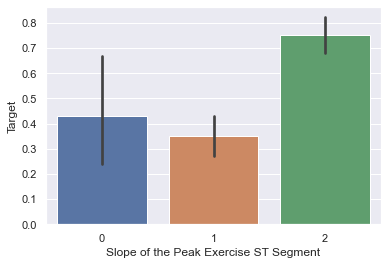

In [271]:
ax = sns.barplot(df['slope'],y)
ax.set(xlabel='Slope of the Peak Exercise ST Segment', ylabel='Target')

### it can be seen that Slope '2' causes heart problems much more than Slope '0' and '1'

In [272]:
### Analyse ca: Number of major vessels(0-3) colored by
### Flouroscopy
df['ca'].unique()

array([2, 0, 1, 3, 4])

[Text(0.5, 0, 'ca: Number of Major Vessels Colored by Flouroscopy'),
 Text(0, 0.5, 'Target')]

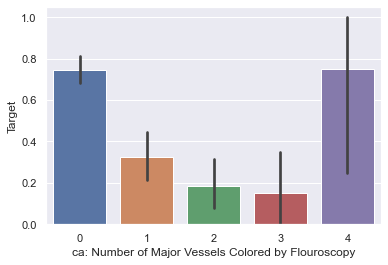

In [273]:
ax = sns.barplot(df['ca'],y)
ax.set(xlabel = 'ca: Number of Major Vessels Colored by Flouroscopy', ylabel = 'Target')

### people with ca = 4 have relatively more heart problem

In [274]:
### ### Explore thal: 3= normal, 6=fixed defect, 7=reversable defect
df['thal'].unique()

array([3, 2, 1, 0])

[Text(0.5, 0, 'Thal:3=Normal; 6=Fixed Defect; 7=Reversible Defect'),
 Text(0, 0.5, 'Target')]

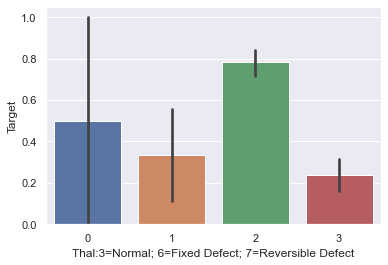

In [275]:
ax = sns.barplot(df['thal'], y)
ax.set(xlabel='Thal:3=Normal; 6=Fixed Defect; 7=Reversible Defect', ylabel='Target')

### We can see people with Thal:3= Normal have fewer heart issues

### Train Test split

In [276]:
from sklearn.model_selection import train_test_split

In [277]:
predictors = df.drop("target",axis=1)
target = df["target"]

In [278]:
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
X_train.shape

(241, 13)

In [279]:
X_test.shape

(61, 13)

In [280]:
Y_train.shape

(241,)

In [281]:
Y_test.shape

(61,)

In [282]:
### V. Model Fitting
from sklearn.metrics import accuracy_score

In [283]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)
Y_pred_lr.shape
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
### The accuracy score achieved using Logistic Regression is: 85.25 %

The accuracy score achieved using Logistic Regression is: 83.61 %


In [284]:
### Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)
Y_pred_nb.shape
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")
### The accuracy score achieved using Naive Bayes is: 85.25 %

The accuracy score achieved using Naive Bayes is: 80.33 %


In [285]:
### SVM
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)
Y_pred_svm.shape
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")
### The accuracy score achieved using Linear SVM is: 81.97 %

The accuracy score achieved using Linear SVM is: 83.61 %


In [286]:
### K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")
### The accuracy score achieved using KNN is: 67.21 %

The accuracy score achieved using KNN is: 65.57 %


In [287]:
### Decision Tree
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x        
#print(max_accuracy)
#print(best_x)
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
print(Y_pred_dt.shape)
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")
### The accuracy score achieved using Decision Tree is: 81.97 %

(61,)
The accuracy score achieved using Decision Tree is: 85.25 %


In [288]:
### Random Forest
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0
for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
Y_pred_rf.shape
print(Y_pred_rf.shape)
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
### print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")
print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")
### The accuracy score achieved using Decision Tree is: 95.08 %

(61,)
The accuracy score achieved using Random Forest is: 86.89 %


In [289]:
### XGBoost
### import xgboost as xgb
### xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
### xgb_model.fit(X_train, Y_train)
### Y_pred_xgb = xgb_model.predict(X_test)
### Y_pred_xgb.shape
### score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
### score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
### print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")
### The accuracy score achieved using XGBoost is: 85.25 %

In [290]:
### Neural Network
### from keras.models import Sequential
### from keras.layers import Dense
### Using TensorFlow backend.
### https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting
### model = Sequential()
### model.add(Dense(11,activation='relu',input_dim=13))
### model.add(Dense(1,activation='sigmoid'))
### model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
### model.fit(X_train,Y_train,epochs=300)
### Y_pred_nn = model.predict(X_test)
### Y_pred_nn.shape
### rounded = [round(x[0]) for x in Y_pred_nn]
### Y_pred_nn = rounded
### score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)
### print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")
### Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.
### The accuracy score achieved using Neural Network is: 80.33 %

### VI. Output final score

The accuracy score achieved using Logistic Regression is: 83.61 %
The accuracy score achieved using Naive Bayes is: 80.33 %
The accuracy score achieved using Support Vector Machine is: 83.61 %
The accuracy score achieved using K-Nearest Neighbors is: 65.57 %
The accuracy score achieved using Decision Tree is: 85.25 %
The accuracy score achieved using Random Forest is: 86.89 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

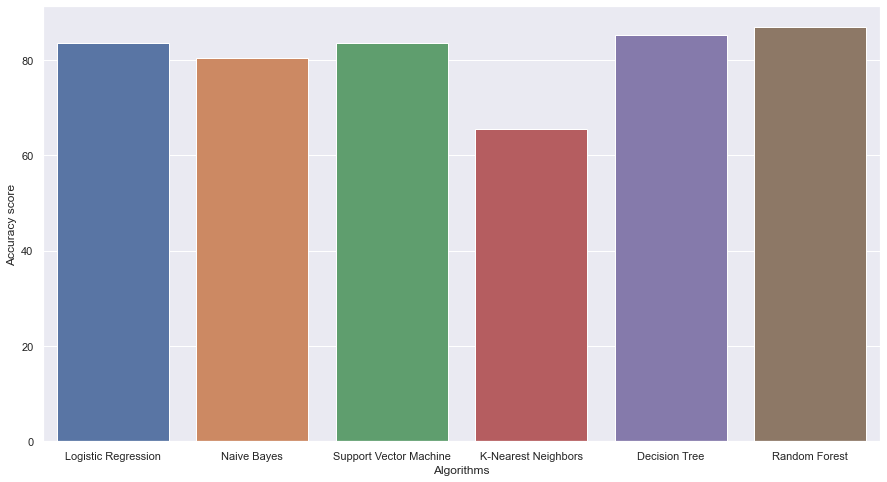

In [291]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    
### print(scores)
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)